In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [2]:
data='https://raw.githubusercontent.com/Balamurugan2007/FOML/refs/heads/main/headbrain.csv'
df = pd.read_csv(data)

print(df.head())

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [5]:
x = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [6]:
x = np.array(x)
y = np.array(y)


In [7]:
mean_x = np.mean(x)
mean_y = np.mean(y)


In [9]:
numerator = np.sum((x - mean_x) * (y - mean_y))
denominator = np.sum((x - mean_x) ** 2)
w1 = numerator / denominator
w0 = mean_y - w1 * mean_x
print(f"Calculated coefficients: w0 = {w0}, w1 = {w1}")

Calculated coefficients: w0 = 325.5734210494428, w1 = 0.2634293394893993


In [10]:
y_pred = w0 + w1 * x

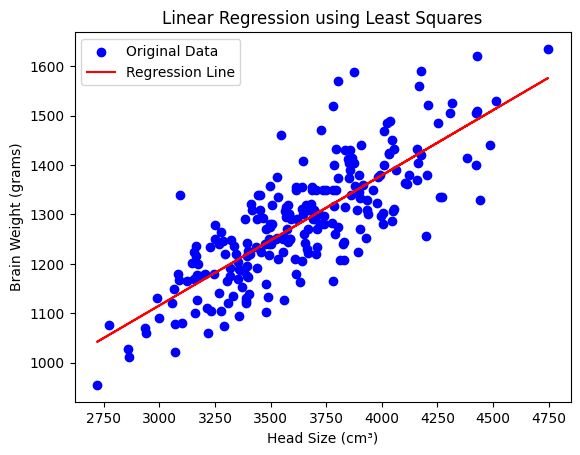

In [11]:
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('Head Size (cm³)')
plt.ylabel('Brain Weight (grams)')
plt.title('Linear Regression using Least Squares')
plt.legend()
plt.show()


In [12]:
mse = np.mean((y - y_pred) ** 2)
print(f"Mean Squared Error (Manual Calculation): {mse}")

Mean Squared Error (Manual Calculation): 5201.3840280023305


In [13]:
x_reshaped = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x_reshaped, y)
y_sklearn = model.predict(x_reshaped)

In [14]:
mse_sklearn = mean_squared_error(y, y_sklearn)
print(f"Mean Squared Error (Scikit-learn): {mse_sklearn}")
print(f"Coefficients from sklearn: w0 = {model.intercept_}, w1 = {model.coef_[0]}")

Mean Squared Error (Scikit-learn): 5201.3840280023305
Coefficients from sklearn: w0 = 325.5734210494426, w1 = 0.26342933948939934
